In [1]:
# Created by Anastasia Filatova 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.tools as tls

import re

In [2]:
# Загружаем обработанный датасет с транзакциями
tr_df = pd.read_csv('final_transactions_with_duplicate_labels_data.csv')

In [20]:
# Маршрут, номер бортового транспорта и дни, в которые больше всего людей платило по картам
rs = tr_df.groupby(['ROUTE_NUM', 'CARRIER_BOARD_NUM', 'TRANSACT_MONTH', 'TRANSACT_DAY']).TRANSACT_TIME.count()
res_list = rs.sort_values(ascending=False)[400:500]
res_list

ROUTE_NUM  CARRIER_BOARD_NUM  TRANSACT_MONTH  TRANSACT_DAY
1          1087               10              10              324
7          1075               10              3               324
10         20232              9               14              324
13         1019               10              22              324
1          215                10              5               324
60         411                9               11              324
1          1092               10              18              324
           1087               10              9               324
           215                10              8               324
68         594                10              2               324
127        1359               9               12              323
1          2053               10              2               322
184        541                9               12              322
13         1019               10              18              322
           1035  

In [4]:
# Маршрут, номер бортового транспорта и дни, в которые меньше всего людей платило по картам
rs = tr_df.groupby(['ROUTE_NUM', 'CARRIER_BOARD_NUM', 'TRANSACT_MONTH', 'TRANSACT_DAY']).TRANSACT_TIME.count()
res_list = rs.sort_values()[:100]
res_list

ROUTE_NUM  CARRIER_BOARD_NUM  TRANSACT_MONTH  TRANSACT_DAY
191        9203               8               16              1
436        183                9               10              1
515        1085               9               12              1
468        564                9               3               1
436        181                9               7               1
                                              6               1
49         4059               10              8               1
130        62                 10              18              1
92         0                  9               28              1
515        621                9               5               1
152        0                  9               6               1
343        17                 9               15              1
436        184                9               7               1
343        24                 9               11              1
468        564                9              

## Анализ самого популярного маршрута среди людей, оплачивающих проезд смарт-картами "Подорожник"

##### Вид и номер маршрута:  
Маршрутка 68

##### Недельный график:  
ежедневно

##### Время работы:  
06:30 - 23:30

##### Расписание или интервал движения:  
15 - 20 мин

##### Конечные остановки:  
Метро "Проспект Ветеранов" - Улица Чекистов  
Улица Чекистов - станция метро "Проспект Ветеранов"

##### Техническая информация:

Длина (расстояние) маршрута в прямом направлении: __8.27 км__  
Остановок: __19__

Длина (расстояние) маршрута в обратном направлении: __8.62 км__  
Остановок: __19__

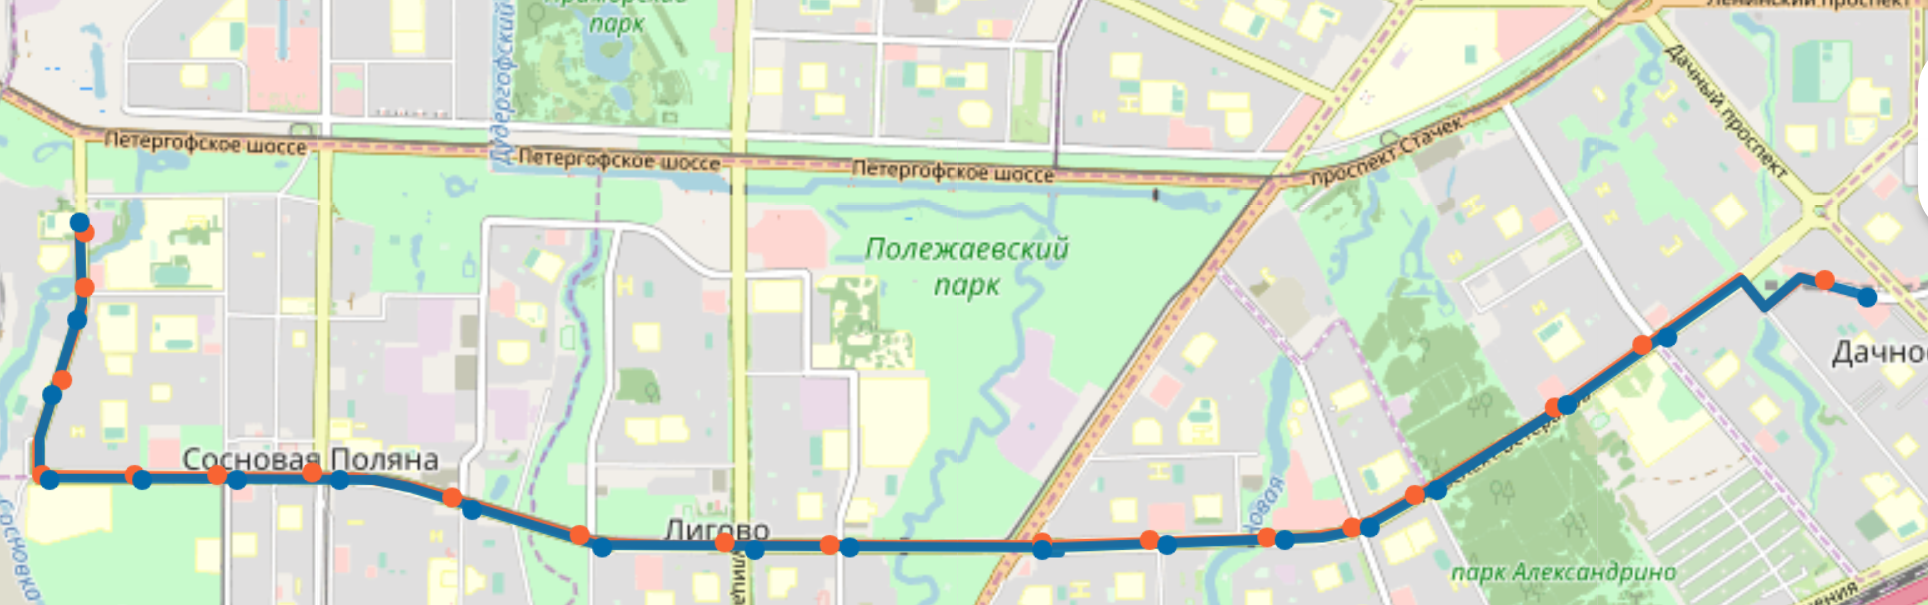

## Дублирующие маршруты общественного транспорта

### Автобус 68

##### Недельный график:  
ежедневно

##### Время работы:  
будни:  
Счастливая улица: 05:40 - 23:51  
ЛЭМЗ: 05:18 - 00:30  
выходные:  
Счастливая улица: 05:52 - 23:36  
ЛЭМЗ: 06:31 - 00:15

##### Расписание или интервал движения:  
будни:   
Счастливая улица:  
05:40, 06:10, 06:40, 07:10, 07:25, 07:40, 07:55,	08:10, 08:26, 08:42, 08:57, 09:12, 09:27, 09:43,	10:00, 10:17, 10:37, 11:03, 11:31, 11:58, 12:26,	12:49, 13:12, 13:36, 13:59, 14:22, 14:45, 15:03,	15:28, 15:44, 15:58, 16:19, 16:38, 16:58, 17:10,	17:21, 17:33, 17:54, 18:14, 18:34, 18:53, 19:36,	20:19, 20:39, 20:59, 21:21, 21:44, 22:26, 23:09,	23:51
ЛЭМЗ:  
05:18, 05:47, 06:21, 06:51, 07:21, 07:51, 08:06,	08:21, 08:36, 08:51, 09:07, 09:23, 09:38, 09:53,	10:08, 10:24, 10:41, 10:58, 11:18, 11:44, 12:12,	12:39, 13:07, 13:30, 13:53, 14:17, 14:40, 15:03,	15:26, 15:46, 16:11, 16:27, 16:41, 17:02, 17:21,	17:41, 17:53, 18:04, 18:16, 18:37, 18:57, 19:17,	19:36, 20:19, 20:58, 21:38, 22:23, 23:05, 23:48, 00:30
выходные:  
Счастливая улица:  
05:52, 06:21, 06:51, 07:20, 07:46, 08:12, 08:33,	08:54, 09:15, 09:35, 09:50, 10:05, 10:23, 10:41,	11:00, 11:17, 11:34, 11:52, 12:11, 12:29, 12:47,	13:05, 13:23, 13:41, 13:59, 14:21, 14:44, 15:06,	15:28, 15:46, 16:04, 16:22, 16:41, 16:59, 17:17,	17:35, 17:57, 18:20, 18:42, 19:04, 19:27, 19:49,	20:11, 20:33, 20:53, 21:17, 21:40, 22:05, 22:51,	23:36
ЛЭМЗ:  
06:31, 07:00, 07:30, 07:59, 08:25, 08:51, 09:12,	09:33, 09:54, 10:14, 10:29, 10:44, 11:02, 11:20, 11:39, 11:58, 12:15, 12:33, 12:52, 13:10, 13:28,	13:46, 14:04, 14:22, 14:40, 15:02, 15:25, 15:47,	16:09, 16:27, 16:45, 17:03, 17:22, 17:40, 17:58,	18:16, 18:38, 19:01, 19:23, 19:45, 20:08, 20:30,	20:50, 21:12, 21:32, 21:56, 22:19, 22:44, 23:30,	00:15

##### Конечные остановки:  
Счастливая улица (посадка) - ЛЭМЗ  
ЛЭМЗ - Счастливая улица (высадка)

##### Техническая информация:

Длина (расстояние) маршрута в прямом направлении: __12.39 км__  
Остановок: __26__

Длина (расстояние) маршрута в обратном направлении: __12.37 км__  
Остановок: __26__

##### Примечания:

Полностью дублирует маршрутку 68 от улицы Чекистов до станции метро "Проспект Ветеранов" и в обратном направлении.

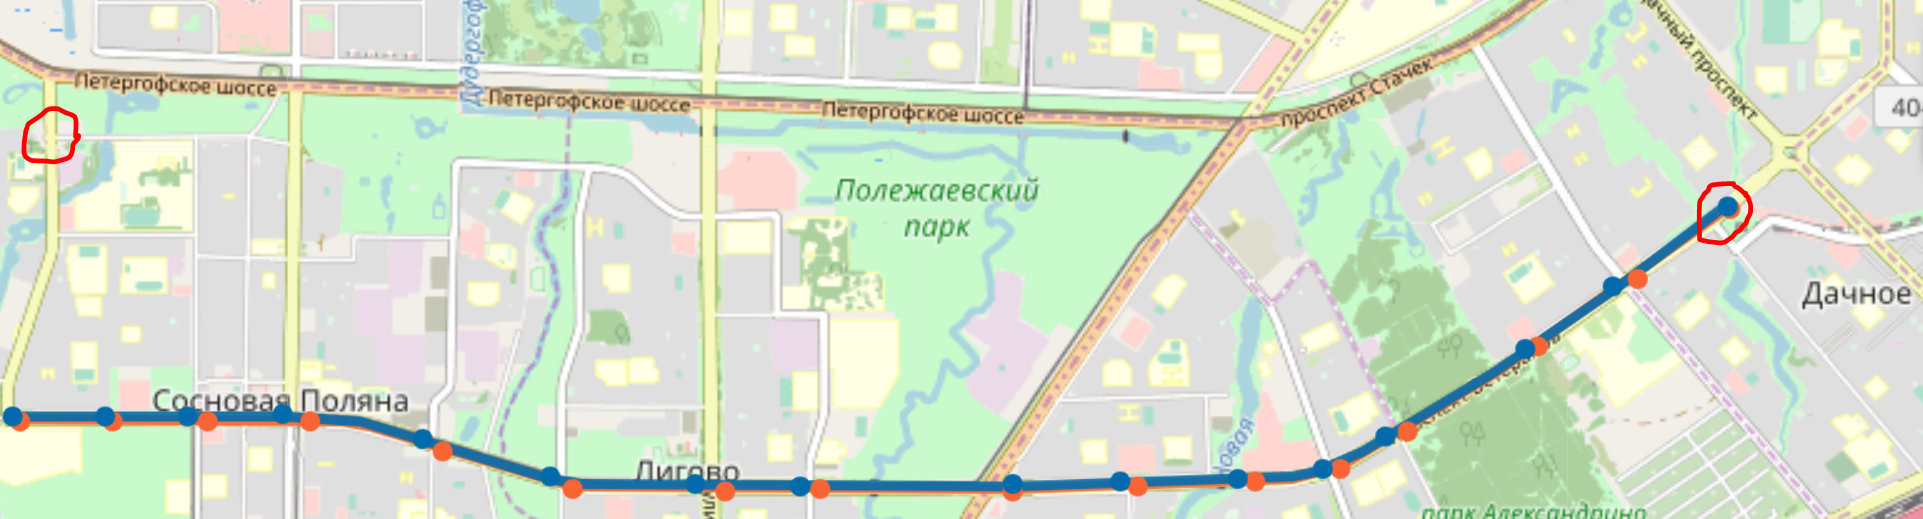


###  Троллебус 37

##### Недельный график:  
ежедневно

##### Время работы:  
Будни:  
Улица Пионерстроя: 05:32 - 01:00  
Метро "Проспект Ветеранов": 05:01 - 00:29  

Выходные дни:  
Улица Пионерстроя: 05:38 - 00:42  
Метро "Проспект Ветеранов": 05:09 - 00:12  

##### Расписание или интервал движения:  
3 - 8 мин.

##### Конечные остановки:  
Улица Пионерстроя - Ст. метро "Проспект Ветеранов"  
Ст. метро "Проспект Ветеранов" - Улица Пионерстроя

##### Классы транспорта:
Большой (70-110 человек)  
Особо большой (больше 110 человек)

##### Техническая информация:

Длина (расстояние) маршрута в прямом направлении: __6.88 км__  
Остановок: __16__ 

Длина (расстояние) маршрута в обратном направлении: __6.94 км__  
Остановок: __16__

##### Примечания:

Частично дублирует маршрутку 68 от пересечения улицы Пионерстроя с проспектом Ветеранов до станции метро "Проспект Ветеранов" и в обратном направлении аналогично. Не захватывает кусок ул. Пионерстроя от пр. Ветеранов до ул. Чекистов.

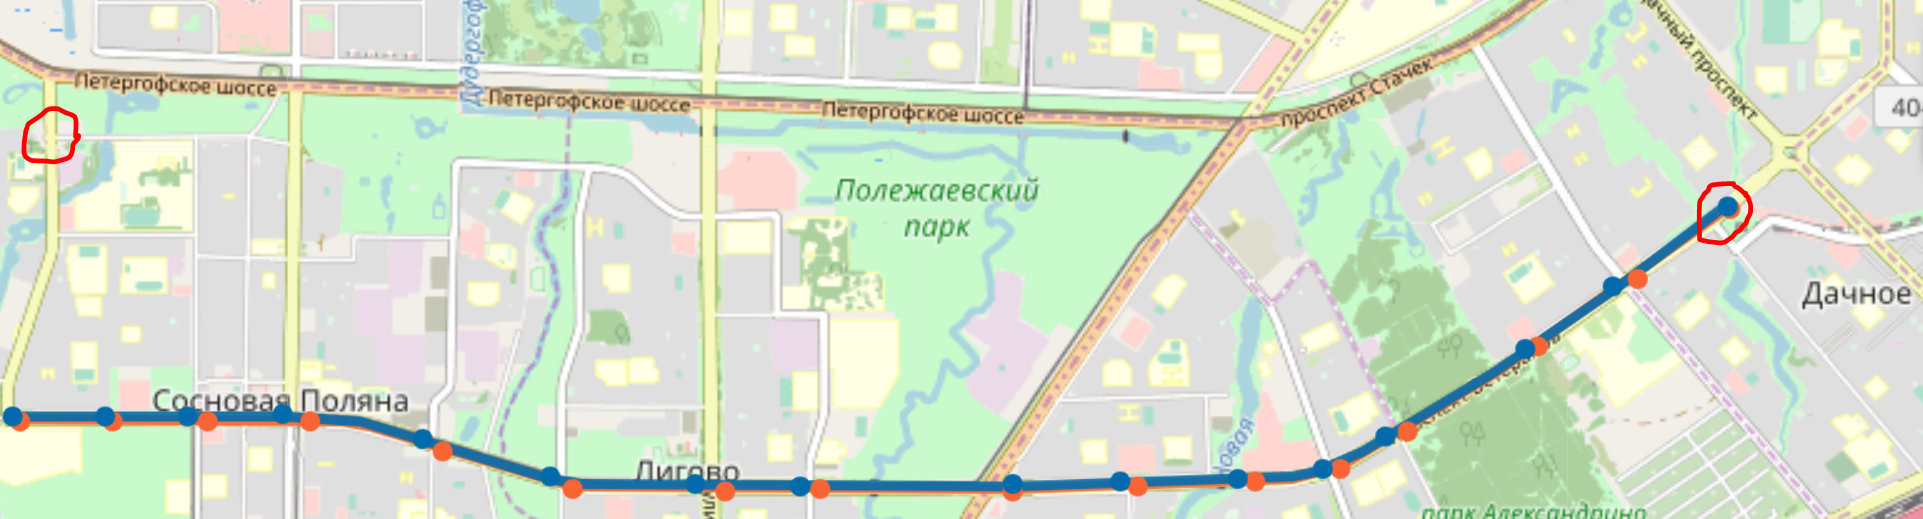

In [5]:
route_df = tr_df[tr_df['ROUTE_NUM'] == '68']
route_df = route_df[route_df['CARRIER_BOARD_NUM'] == 0]
route_df = route_df[route_df['TRANSACT_MONTH'] == 10]
route_df = route_df[route_df['TRANSACT_DAY'] == 11]
route_df = route_df.reset_index(drop=True)
route_df = route_df.sort_values(by = 'TRANSACT_TIME')
route_df = route_df.reset_index(drop=True)
route_df

,Unnamed: 0,CARD_NUM,TRANSACT_DAY,TRANSACT_MONTH,TRANSACT_YEAR,ID_ROUTE,CARRIER_BOARD_NUM,TRANSACT_TIME,ROUTE_NUM,IS_DUPLICATE
0,1211598,4247805101,11,10,2018,531,0,00:23:00,68,0
1,1211599,4247805101,11,10,2018,531,0,00:23:24,68,1
2,931103,36126116719117500,11,10,2018,531,0,00:24:00,68,0
3,931104,36126116719117572,11,10,2018,531,0,00:24:23,68,0
4,1002640,36126405151041700,11,10,2018,531,0,00:25:00,68,0
5,840983,36126097259776700,11,10,2018,531,0,00:25:00,68,0
6,1002643,36126405151041796,11,10,2018,531,0,00:25:31,68,0
7,840985,36126097259776772,11,10,2018,531,0,00:25:36,68,0
8,726071,36125172229748900,11,10,2018,531,0,00:29:00,68,0
9,726077,36125172229748996,11,10,2018,531,0,00:29:08,68,0


In [25]:
times = route_df['TRANSACT_TIME'].values
number_of_notes = route_df.shape[0]

In [26]:
# Вспомогательная функция, вычисляющая разность между двумя переданными временными штампами в секундах 
# Допущения: timestamp2 > timestamp1, это гарантируется при подаче на вход
def get_times_delta(timestamp1, timestamp2):
    time_arr1 = timestamp1.split(':')
    time_arr2 = timestamp2.split(':')
    return (int(time_arr2[2]) + int(time_arr2[1]) * 60 + int(time_arr2[0]) * 3600) - (int(time_arr1[2]) + int(time_arr1[1]) * 60 + int(time_arr1[0]) * 3600)

get_times_delta("05:23:16", "07:26:00")

7364

In [27]:
trips_pivot = 600
trips = [1]
key = 1
for i in range(1, number_of_notes):
    if get_times_delta(times[i-1], times[i]) >= trips_pivot:
        key += 1
        trips.append(key)
    else:
        trips.append(key)
trips

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [28]:
trip_id = pd.Series(np.array(trips), index=route_df.index)
route_df.loc[:, 'TRIP_ID'] = trip_id
route_df

,Unnamed: 0,CARD_NUM,TRANSACT_DAY,TRANSACT_MONTH,TRANSACT_YEAR,ID_ROUTE,CARRIER_BOARD_NUM,TRANSACT_TIME,ROUTE_NUM,IS_DUPLICATE,TRIP_ID
0,1211598,4247805101,11,10,2018,531,0,00:23:00,68,0,1
1,1211599,4247805101,11,10,2018,531,0,00:23:24,68,1,1
2,931103,36126116719117500,11,10,2018,531,0,00:24:00,68,0,1
3,931104,36126116719117572,11,10,2018,531,0,00:24:23,68,0,1
4,1002640,36126405151041700,11,10,2018,531,0,00:25:00,68,0,1
5,840983,36126097259776700,11,10,2018,531,0,00:25:00,68,0,1
6,1002643,36126405151041796,11,10,2018,531,0,00:25:31,68,0,1
7,840985,36126097259776772,11,10,2018,531,0,00:25:36,68,0,1
8,726071,36125172229748900,11,10,2018,531,0,00:29:00,68,0,1
9,726077,36125172229748996,11,10,2018,531,0,00:29:08,68,0,1


In [29]:
trip2_df = route_df[route_df['TRIP_ID'] == 2]
trip2_df

,Unnamed: 0,CARD_NUM,TRANSACT_DAY,TRANSACT_MONTH,TRANSACT_YEAR,ID_ROUTE,CARRIER_BOARD_NUM,TRANSACT_TIME,ROUTE_NUM,IS_DUPLICATE,TRIP_ID
28,775184,36125181224103400,11,10,2018,531,0,05:23:00,68,0,2
29,775185,36125181224103428,11,10,2018,531,0,05:23:16,68,0,2
30,82145,3311354512,11,10,2018,531,0,05:24:00,68,0,2
31,82146,3311354512,11,10,2018,531,0,05:24:25,68,1,2
32,82751,3311426672,11,10,2018,531,0,05:26:00,68,0,2
33,82752,3311426672,11,10,2018,531,0,05:26:15,68,1,2
34,818663,36125887611355100,11,10,2018,531,0,05:27:00,68,0,2
35,818671,36125887611355140,11,10,2018,531,0,05:27:34,68,0,2
36,810239,36125593001475800,11,10,2018,531,0,05:32:00,68,0,2
37,810254,36125593001475844,11,10,2018,531,0,05:32:06,68,0,2


In [34]:
times = trip2_df['TRANSACT_TIME'].values
number_of_notes = times.shape[0]
time_pivot = 40
finals_pivot = 7
finals_clusters = []
cluster = [times[0]]
counter = 1
for i in range(1, number_of_notes):
    if get_times_delta(times[i-1], times[i]) <= time_pivot:
        cluster.append(times[i])
        counter += 1
    else:
        counter = 0
        finals_clusters.append(cluster)
        cluster = []
finals_clusters

[['05:23:00', '05:23:16'],
 ['05:24:25'],
 ['05:26:15'],
 ['05:27:34'],
 ['05:32:06'],
 ['05:34:07'],
 ['05:35:00', '05:35:05', '05:35:10'],
 ['05:37:00'],
 ['05:37:52',
  '05:38:00',
  '05:38:00',
  '05:38:00',
  '05:38:38',
  '05:38:39',
  '05:38:45',
  '05:39:00',
  '05:39:35'],
 ['05:41:08'],
 ['05:42:00'],
 ['05:42:53', '05:43:00', '05:43:00', '05:43:30', '05:43:34'],
 ['05:45:00',
  '05:45:00',
  '05:45:00',
  '05:45:04',
  '05:45:26',
  '05:45:33',
  '05:45:55',
  '05:46:00',
  '05:46:00'],
 ['05:46:58', '05:47:00', '05:47:00', '05:47:03'],
 ['05:48:00'],
 ['05:49:00',
  '05:49:39',
  '05:50:00',
  '05:50:00',
  '05:50:27',
  '05:50:40',
  '05:51:00',
  '05:51:00',
  '05:51:27',
  '05:51:28'],
 ['06:00:00', '06:00:03', '06:00:15'],
 ['06:02:10'],
 ['06:03:00',
  '06:03:00',
  '06:03:02',
  '06:03:09',
  '06:03:32',
  '06:04:00',
  '06:04:22',
  '06:05:00',
  '06:05:00',
  '06:05:00',
  '06:05:25',
  '06:05:52',
  '06:05:55',
  '06:06:00',
  '06:06:35',
  '06:07:00',
  '06:07:00'